# Building Decision Tree

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pydot

In [3]:
!pip install pydotplus

In [4]:
!pip install graphviz
!conda install -y graphviz

Solving environment: done

# All requested packages already installed.



## **Decision Tree** Algorithm

Let us understand the Decision Tree algorithm through an example. We will take an arbitrary example with 2 independent variables.

Suppose that we have 10 data points in 2 variables as given below. The third attribute is the label which can be 0 or 1.

(1,4,0),(7,6,0),(1,6,0),(1,2,1),(5,2,1),(7,2,1),(5,4,0),(2,4,0),(1,7,1),(2,7,1)

We can treat these data points as 10 records having 2 features - x1, x2. We create a dataframe of these point and see what this looks like.

In [5]:
import pandas as pd

df = pd.DataFrame([(1,4,0),(7,6,0),(1,6,0),(1,2,1),(5,2,1),(7,2,1),(5,4,0),(2,4,0),(1,7,1),(2,7,1)], 
                  columns = ['x1', 'x2', 'y'])
df

,x1,x2,y
0,1,4,0
1,7,6,0
2,1,6,0
3,1,2,1
4,5,2,1
5,7,2,1
6,5,4,0
7,2,4,0
8,1,7,1
9,2,7,1


First we plot our data to be able to visualize it.

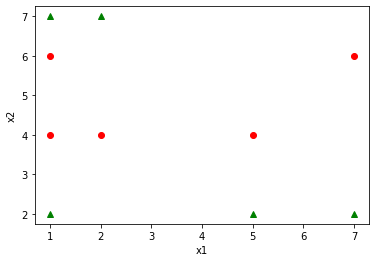

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['x1'][df['y']==0], df['x2'][df['y']==0], 'ro', df['x1'][df['y']==1], df['x2'][df['y']==1], 'g^')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

To make the decision tree, we need to try various points for the features x1 and x2 where we can split the decision. So, we compute the possible values of x1 and x2 where there could be a split.

In [7]:
import numpy as np

# Split thresholds
x1_ = np.arange(df['x1'].min(), df['x1'].max()+1, 0.5)
x2_ = np.arange(df['x2'].min(), df['x2'].max()+1, 0.5)

print(x1_)
print('\n')
print(x2_)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5]


[2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5]


To build our Decision Tree, we need to pick one of the 2 independent variables (in our example). This will become our **Root Node**. The question is how do we pick a node? We can use the **CART (Classification and Regression Tree)** algorithm and use the measure called **Gini Index**.

### Building a Decision Tree using the CART Algorithm based on Gini Index

**Gini Index is a measure of impurity or purity used while creating a decision tree using the *CART (Classification and Regression Tree)* algorithm.**

**GiniIndex(t) = 1 - Σ(P(i|t)^2), where i = 1 to j. Here, j is the number of classes in the dataset.**

In our example, we have j = 2 as we have 2 classes represented by 0 and 1.

**GiniIndex(full dataset) = 1 - (P(0)^2 + P(1)^2)**

Now, P(0) = 5/10 and P(1) = 5/10

So, *GiniIndex(full dataset) = 1 - ((5/10)^2 + (5/10)^2) = 1 - (0.25 + 0.25) = 1 - 0.5 = 0.5*

Now that we understand how to compute the Gini Index, we write a function to compute the Gini Index.

In [8]:
# Function to compute Gini Index
def giniIndex(dataframe, classes = [0, 1]):
    m = len(dataframe)
    if m == 0:
        return 1
    
    mi = []
    for cls in classes:
        mi.append(sum(dataframe.iloc[:,-1] == cls))
        
    gini = 1 - sum((np.array(mi) / m)**2)
    
    return gini

Let us use  our function to compute the Gini Index for the complete dataset.

In [9]:
giniIndex(df)

0.5

We need to compute the Gini Index for all the split points that we have established (The split points to evaluate are stored in x1_ and x2_).

### The CART Training Algorithm

We use the Classification  And  Regression  Tree  (CART)  algorithm  to  train Decision Trees (also called “growing” trees). CART constructs binary trees using the feature and threshold that yield the largest information gain or minimum gini-impurity at each node.

*Cart Cost Function For Classification*

$J_{k,t_k} =$ $\frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

\begin{equation*}
Where\begin{cases}
         G_{left/right} \hspace{0.25cm} \text{measures the  impurity  of  the  left/right  subset}, \\
         m_{left/right} \hspace{0.25cm} \text{is  the  number  of  instances  in  the  left/right  subset}  \\
     \end{cases}
\end{equation*}

The equation shows that the algorithm first the splits the training subsets using a single feature $k$ and a limiting value or condition $t_k$. The algorithm works as follows:

- It creates different pairs of $(k,t_k)$. It searches for the pair that produces the purest subset (i.e.minimum gini-impurity) weighted by their size.

Once it splits the training set in  two, it splits the subsets using the same algorithm.

Let us create a function to calculate the Cost Function. We will call it the Loss Function.

In [10]:
# Loss function 
def lossFunction(dataf, feature, threshold):
    m = len(dataf)
    data_l = dataf[dataf[feature] <= threshold]
    data_r = dataf[dataf[feature] > threshold]
    ml = len(data_l)
    mr = len(data_r)
    loss = (ml * giniIndex(data_l) + mr * giniIndex(data_r)) / m
    
    return loss, data_l, data_r

In [11]:
df[df['x1'] <= 1]

,x1,x2,y
0,1,4,0
2,1,6,0
3,1,2,1
8,1,7,1


So, m<sub>left</sub> = 4.

In [12]:
df[df['x1'] > 1]

,x1,x2,y
1,7,6,0
4,5,2,1
5,7,2,1
6,5,4,0
7,2,4,0
9,2,7,1


So, m<sub>right</sub> = 6.

In [13]:
gmLeft = giniIndex(df[df['x1'] <= 1])
gmRight = giniIndex(df[df['x1'] > 1])
print('Gini Index for x<=1 = ', gmLeft)
print('Gini Index for x>1 = ', gmRight)

Gini Index for x<=1 =  0.5
Gini Index for x>1 =  0.5


So, Loss is calculated as follows:

Loss = ((m<sub>left</sub> * Gini(left) + (m<sub>right</sub> * Gini(right)) / m = (4 * 0.5 + 6 * 0.5) / 10 = (2 + 3) / 10 = 5 / 10 = 0.5

Let us test it with our function.

In [14]:
lossFunction(df, 'x1', 1)

(0.5,
    x1  x2  y
 0   1   4  0
 2   1   6  0
 3   1   2  1
 8   1   7  1,
    x1  x2  y
 1   7   6  0
 4   5   2  1
 5   7   2  1
 6   5   4  0
 7   2   4  0
 9   2   7  1)

Now, let us compute the Loss for each split point under our consideration and establish the split point where the loss is the least.

In [15]:
# For (feature, value) pairs compute loss values
losses = []
feature = []
thresholds = []

for x1 in x1_:
    feature.append('x1')
    thresholds.append(x1)
    losses.append(lossFunction(df, 'x1', x1)[0])

for x2 in x2_:
    feature.append('x2')
    thresholds.append(x2)
    losses.append(lossFunction(df, 'x2', x2)[0])
    
dfLoss = pd.DataFrame({"Feature": feature, "Threshold": thresholds, "Loss": losses})
print('Minimum Loss Point:', dfLoss[dfLoss.Loss == dfLoss.Loss.min()])
print('\n')
print(dfLoss)

Minimum Loss Point:    Feature  Threshold      Loss
14      x2        2.0  0.285714
15      x2        2.5  0.285714
16      x2        3.0  0.285714
17      x2        3.5  0.285714


   Feature  Threshold      Loss
0       x1        1.0  0.500000
1       x1        1.5  0.500000
2       x1        2.0  0.500000
3       x1        2.5  0.500000
4       x1        3.0  0.500000
5       x1        3.5  0.500000
6       x1        4.0  0.500000
7       x1        4.5  0.500000
8       x1        5.0  0.500000
9       x1        5.5  0.500000
10      x1        6.0  0.500000
11      x1        6.5  0.500000
12      x1        7.0  0.500000
13      x1        7.5  0.500000
14      x2        2.0  0.285714
15      x2        2.5  0.285714
16      x2        3.0  0.285714
17      x2        3.5  0.285714
18      x2        4.0  0.500000
19      x2        4.5  0.500000
20      x2        5.0  0.500000
21      x2        5.5  0.500000
22      x2        6.0  0.375000
23      x2        6.5  0.375000
24      x2        

We have more than 1 split where the loss is minimum. So, we can pick any one of them as our split point. We pick the last of such points.

In [16]:
# Min loss value occurs at
minLossValue = dfLoss['Loss'].min()
minLoss = dfLoss[dfLoss['Loss'] == minLossValue].iloc[[-1], :]
minLoss

,Feature,Threshold,Loss
17,x2,3.5,0.285714


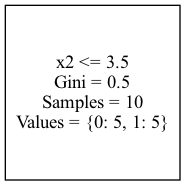

In [17]:
import graphviz
import pydot
from IPython.display import Image

dot = graphviz.Digraph('decision-tree', comment='Decision Tree')  
dot.node('RootNode', label=f"x2 <= {minLoss['Threshold'].values[0]}\nGini = {giniIndex(df)}\nSamples = {len(df)}\nValues = {df['y'].value_counts().to_dict()}", shape = 'square')
dot.render(filename = './temp.dot')
(graph,) = pydot.graph_from_dot_file('./temp.dot')
graph.write_png('./temp.png')
Image('./temp.png')

So, we have our Root Node.

Now, let us examine the set x2 <= 3.75.

In [18]:
# First split
loss1, df_left, df_right = lossFunction(df, minLoss['Feature'].values[0], minLoss['Threshold'].values[0])
giniIndex(df_left)

0.0

So, we have a Leaf Node as the Gini Index is 0.

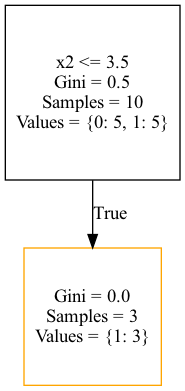

In [19]:
dot = graphviz.Digraph('decision-tree', comment='Decision Tree')  
dot.node('RootNode', label=f"x2 <= {minLoss['Threshold'].values[0]}\nGini = {giniIndex(df)}\nSamples = {len(df)}\nValues = {df['y'].value_counts().to_dict()}", shape = 'square')
dot.node('LeafNode1', label=f"Gini = {giniIndex(df_left)}\nSamples = {len(df_left)}\nValues = {df_left['y'].value_counts().to_dict()}", shape = 'square', color='orange')
dot.edge('RootNode', 'LeafNode1', label = 'True')
dot.render(filename = './temp.dot')
(graph,) = pydot.graph_from_dot_file('./temp.dot')
graph.write_png('./temp.png')
Image('./temp.png')

Now, let us test the set x2 > 3.75.

In [20]:
giniIndex(df_right)

0.40816326530612246

We find that there is some impurity at this node. So, this is a node we have to split further.

In [21]:
# New Split thresholds
x1_r = np.arange(df_right['x1'].min(), df_right['x1'].max()+1, 0.5)               
x2_r = np.arange(df_right['x2'].min(), df_right['x2'].max()+1, 0.5)

losses2 = []
feature2 = []
thresholds2 = []

for x1 in x1_r:
    feature2.append('x1')
    thresholds2.append(x1)
    losses2.append(lossFunction(df_right, 'x1', x1)[0])

for x2 in x2_r:
    feature2.append('x2')
    thresholds2.append(x2)
    losses2.append(lossFunction(df_right, 'x2', x2)[0])
    
dfloss_r = pd.DataFrame({"Feature": feature2, "Threshold": thresholds2, "Loss": losses2})
print('Minimum Loss Point:', dfloss_r[dfloss_r.Loss == dfloss_r.Loss.min()])
print('\n')
print(dfloss_r)

Minimum Loss Point:    Feature  Threshold  Loss
18      x2        6.0   0.0
19      x2        6.5   0.0


   Feature  Threshold      Loss
0       x1        1.0  0.404762
1       x1        1.5  0.404762
2       x1        2.0  0.342857
3       x1        2.5  0.342857
4       x1        3.0  0.342857
5       x1        3.5  0.342857
6       x1        4.0  0.342857
7       x1        4.5  0.342857
8       x1        5.0  0.380952
9       x1        5.5  0.380952
10      x1        6.0  0.380952
11      x1        6.5  0.380952
12      x1        7.0  0.408163
13      x1        7.5  0.408163
14      x2        4.0  0.285714
15      x2        4.5  0.285714
16      x2        5.0  0.285714
17      x2        5.5  0.285714
18      x2        6.0  0.000000
19      x2        6.5  0.000000
20      x2        7.0  0.408163
21      x2        7.5  0.408163


Again we find that we have multiple points where the loss s minimum. So, we will pick the last of these points for a split. However, we find that the Gini Index is 0. So, this split will yield 2 Leaf Nodes.

In [22]:
min_loss_value_r = dfloss_r['Loss'].min()
min_loss_r = dfloss_r[dfloss_r['Loss'] == min_loss_value_r].iloc[[-1], :]
min_loss_r

,Feature,Threshold,Loss
19,x2,6.5,0.0


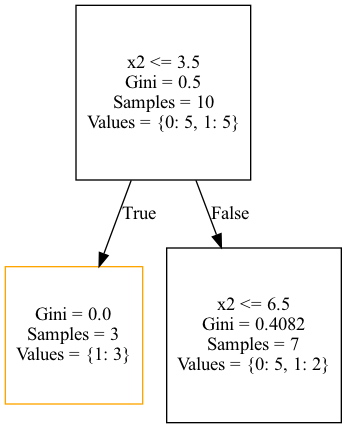

In [23]:
dot = graphviz.Digraph('decision-tree', comment='Decision Tree')  
dot.node('RootNode', label=f"x2 <= {minLoss['Threshold'].values[0]}\nGini = {giniIndex(df)}\nSamples = {len(df)}\nValues = {df['y'].value_counts().to_dict()}", shape = 'square')
dot.node('LeafNode1', label=f"Gini = {giniIndex(df_left)}\nSamples = {len(df_left)}\nValues = {df_left['y'].value_counts().to_dict()}", shape = 'square', color='orange')
dot.node('Node1', label=f"x2 <= {min_loss_r['Threshold'].values[0]}\nGini = {giniIndex(df_right).round(4)}\nSamples = {len(df_right)}\nValues = {df_right['y'].value_counts().to_dict()}", shape = 'square')
dot.edge('RootNode', 'LeafNode1', label = 'True')
dot.edge('RootNode', 'Node1', label = 'False')
dot.render(filename = './temp.dot')
(graph,) = pydot.graph_from_dot_file('./temp.dot')
graph.write_png('./temp.png')
Image('./temp.png')

In [24]:
# Second split
loss2, df_right_left, df_right_right = lossFunction(df_right, min_loss_r['Feature'].values[0], min_loss_r['Threshold'].values[0])

print('Gini Index - Left:', giniIndex(df_right_left))
print('Gini Index - Right:', giniIndex(df_right_right))

Gini Index - Left: 0.0
Gini Index - Right: 0.0


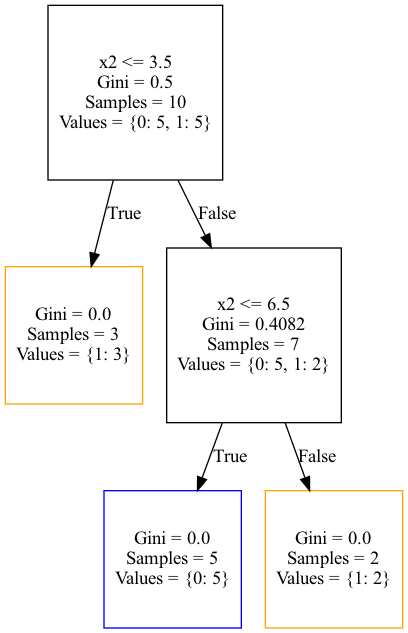

In [25]:
dot = graphviz.Digraph('decision-tree', comment='Decision Tree')  
dot.node('RootNode', label=f"x2 <= {minLoss['Threshold'].values[0]}\nGini = {giniIndex(df)}\nSamples = {len(df)}\nValues = {df['y'].value_counts().to_dict()}", shape = 'square')
dot.node('LeafNode1', label=f"Gini = {giniIndex(df_left)}\nSamples = {len(df_left)}\nValues = {df_left['y'].value_counts().to_dict()}", shape = 'square', color='orange')
dot.node('Node1', label=f"x2 <= {min_loss_r['Threshold'].values[0]}\nGini = {giniIndex(df_right).round(4)}\nSamples = {len(df_right)}\nValues = {df_right['y'].value_counts().to_dict()}", shape = 'square')
dot.node('LeafNode2', label=f"Gini = {giniIndex(df_right_left)}\nSamples = {len(df_right_left)}\nValues = {df_right_left['y'].value_counts().to_dict()}", shape = 'square', color='blue')
dot.node('LeafNode3', label=f"Gini = {giniIndex(df_right_right)}\nSamples = {len(df_right_right)}\nValues = {df_right_right['y'].value_counts().to_dict()}", shape = 'square', color='orange')
dot.edge('RootNode', 'LeafNode1', label = 'True')
dot.edge('RootNode', 'Node1', label = 'False')
dot.edge('Node1', 'LeafNode2', label = 'True')
dot.edge('Node1', 'LeafNode3', label = 'False')
dot.render(filename = './temp.dot')
(graph,) = pydot.graph_from_dot_file('./temp.dot')
graph.write_png('./temp.png')
Image('./temp.png')

#### Building Decision Tree using Scikit-Learn.

In reality, we do not have to perform so many calculations. We will generally use a library and one such library is Scikit-Learn. Below we create the Decision Tree for this data using Scikit-Learn. Note that it is different from our Tree as Scikit-Learn treats all features as a continuous variable.

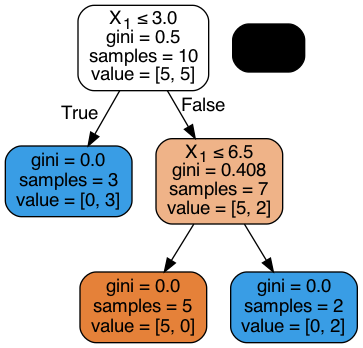

In [26]:
from sklearn.tree import DecisionTreeClassifier

X = df[['x1', 'x2']]
y = df['y']

dtree = DecisionTreeClassifier(criterion = 'gini')
dtree.fit(X, y)

from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())